In [9]:
import pandas as pd
import numpy as np
import scipy
from scipy.optimize import minimize

In [2]:
import matplotlib.pyplot as plt
%matplotlib inline

### Задача 1. Минимизация гладкой функции

\begin{align}
f(x) = sin(\frac{x}{5}) * exp(\frac{x}{10}) + 5 * exp(\frac{-x}{2})
\end{align}

Функция определена на промежутке [1, 30]

In [3]:
from math import sin
from math import exp

In [4]:
def function1(x):
    y = sin(float(x)/5) * exp(float(x)/10) + 5 * exp(float(-x)/2)
    return y

In [5]:
function1(3)

1.8778384165859365

In [23]:
ys = [function1(i) for i in range(1, 31)]
xs = [i for i in range(1, 31)]

Text(0.5, 1.0, 'График функции 1')

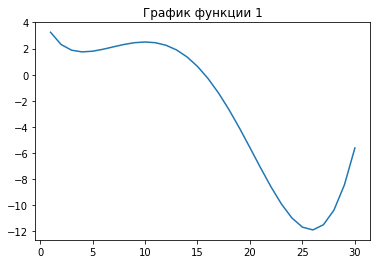

In [37]:
plt.plot(xs, ys)
plt.title('График функции 1')

#### Применим разные варианты минимизации с помощью градиентных методов оптимизации

In [14]:
minimize(function1, [5], bounds = [(0, 31)])

      fun: 1.7452682903319727
 hess_inv: <1x1 LbfgsInvHessProduct with dtype=float64>
      jac: array([-2.22044605e-08])
  message: b'CONVERGENCE: NORM_OF_PROJECTED_GRADIENT_<=_PGTOL'
     nfev: 14
      nit: 6
   status: 0
  success: True
        x: array([4.1362887])

In [15]:
minimize(function1, [19], bounds = [(0, 31)])

      fun: -11.898894665942215
 hess_inv: <1x1 LbfgsInvHessProduct with dtype=float64>
      jac: array([-6.92779167e-06])
  message: b'CONVERGENCE: NORM_OF_PROJECTED_GRADIENT_<=_PGTOL'
     nfev: 18
      nit: 5
   status: 0
  success: True
        x: array([25.88018157])

In [29]:
minimize(function1, x0 = 2, method = 'BFGS')

      fun: 1.7452682903447336
 hess_inv: array([[5.98752645]])
      jac: array([-2.04145908e-06])
  message: 'Optimization terminated successfully.'
     nfev: 21
      nit: 6
     njev: 7
   status: 0
  success: True
        x: array([4.13627628])

In [30]:
minimize(function1, x0 = 30, method = 'BFGS')

      fun: -11.898894665981313
 hess_inv: array([[1.67936744]])
      jac: array([0.])
  message: 'Optimization terminated successfully.'
     nfev: 21
      nit: 6
     njev: 7
   status: 0
  success: True
        x: array([25.88019321])

### Задача 2. Глобальная оптимизация

#### Применим метод дифференциальной эволюции

In [31]:
from scipy.optimize import differential_evolution

In [32]:
differential_evolution(function1, bounds = [(1, 31)])

     fun: -11.898894665981294
     jac: array([1.77635684e-07])
 message: 'Optimization terminated successfully.'
    nfev: 98
     nit: 5
 success: True
       x: array([25.88019334])

### Задача 3. Минимизация негладкой функции

#### Найдём минимум негладкой функции с помощью градиентых методов и метода дифференциальной эволюции

In [33]:
def function2(x):
    y = int(function1(x))
    return y

In [47]:
[function2(i) for i in range(25, 31)]

[-11, -11, -11, -10, -8, -5]

In [35]:
ys2 = [function2(i) for i in range(1, 31)]
xs2 = [i for i in range(1, 31)]

Text(0.5, 1.0, 'График функции 2')

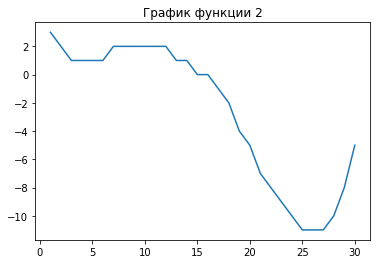

In [38]:
plt.plot(xs2, ys2)
plt.title('График функции 2')

In [42]:
minimize(function2, x0 = 30, method = 'BFGS') # данный метод не позволяет найти истинный минимум функции

      fun: -5
 hess_inv: array([[1]])
      jac: array([0.])
  message: 'Optimization terminated successfully.'
     nfev: 3
      nit: 0
     njev: 1
   status: 0
  success: True
        x: array([30.])

In [43]:
differential_evolution(function2, bounds = [(1, 31)]) # метод дифференциальной эфолюции справляется с задачей

     fun: -11.0
 message: 'Optimization terminated successfully.'
    nfev: 92
     nit: 5
 success: True
       x: array([26.98090176])